## Data Information

### Source

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. <br>
I-Cheng Yeh, "Modeling of strength of high performance concrete using artificial neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998).

### Attribute information

The dataset attributes properties are as follows:

Name -- Data Type -- Measurement -- Description

- Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
- Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
- Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
- Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable- 
- Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
- Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
- Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
- Age -- quantitative -- Day (1~365) -- Input Variable
- Concrete compressive strength -- quantitative -- MPa -- Output Variable

## Notebook Setup

In [2]:
#Common imports
import sys
import os
import numpy as np

#Python Data Analysis Library
import pandas as pd

#Data visualization
%matplotlib inline 
#sets the backend of matplotlib to the 'inline' backend
#%matplotlib notebook
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Data Import

In [3]:
df = pd.read_excel("http://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement (component 1)(kg in a m^3 mixture)                1030 non-null float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1030 non-null float64
Fly Ash (component 3)(kg in a m^3 mixture)               1030 non-null float64
Water  (component 4)(kg in a m^3 mixture)                1030 non-null float64
Superplasticizer (component 5)(kg in a m^3 mixture)      1030 non-null float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1030 non-null float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        1030 non-null float64
Age (day)                                                1030 non-null int64
Concrete compressive strength(MPa, megapascals)          1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


## Data Engineering and Visualization 

### Renaming column names

In [12]:
df.columns =  [ "cement","blast_furnace_slag", "fly_ash", "water",
                     "superplasticizer", "coarse_aggregate", "fine_aggregate",
                     "age","compressive_strength"]

### Percentage of missing values

In [14]:
df.isnull().sum()/len(df)*100

cement                  0.0
blast_furnace_slag      0.0
fly_ash                 0.0
water                   0.0
superplasticizer        0.0
coarse_aggregate        0.0
fine_aggregate          0.0
age                     0.0
compressive_strength    0.0
dtype: float64

### Descriptive statistics

In [15]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


### Numerical and Categorical attributes

In [16]:
def coltype(data):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numeric = list(df.select_dtypes(include=numerics).columns)
    non_numeric =['bool','category']
    categorical = list(df.select_dtypes(include=non_numeric).columns)
    return (numeric, categorical)

In [17]:
df_numeric,df_categorical = coltype(df)

In [18]:
df_numeric

['cement',
 'blast_furnace_slag',
 'fly_ash',
 'water',
 'superplasticizer',
 'coarse_aggregate',
 'fine_aggregate',
 'age',
 'compressive_strength']

In [20]:
df_categorical

[]

### Histrograms for numeric

In [21]:
def hist_plots(data, numeric,col_no):
    data_fig = pd.melt(data, value_vars= numeric)
    fig = sns.FacetGrid(data_fig, col = "variable", col_wrap = col_no,sharex= False, sharey = False)
    fig = fig.map(sns.distplot, "value", color = 'c')
    return fig
#col_no : number of columns to display in one row
#numeric : name of numeric cols

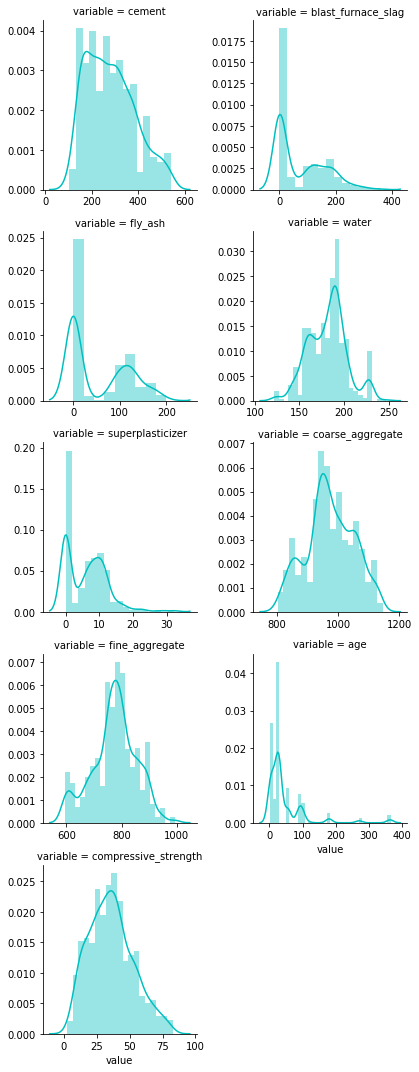

In [22]:
hist_plots(df,df_numeric,2)

### Correlation matrix

In [23]:
# Compute pairwise correlation of Dataframe's attributes
corr = df.corr()
corr

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,compressive_strength
cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
blast_furnace_slag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
fly_ash,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
superplasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
coarse_aggregate,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
fine_aggregate,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
compressive_strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


In [24]:
def corr_plot(data_corr):
    palette = sns.diverging_palette(20, 220, as_cmap=True)
    fig, (ax) = plt.subplots(1, 1, figsize=(10,6))
    fig = sns.heatmap(data_corr, 
                 ax=ax,# Axes in which to draw the plot, otherwise use the currently-active Axes.
                 vmin = -1.0,
                 vmax = 1.0,
                 cmap=palette, # Color Map.
                 square=True, # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=False, 
                 fmt='.2f',# String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.5)
    return fig

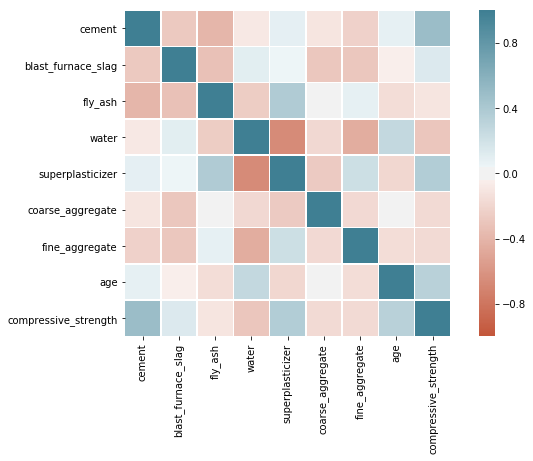

In [25]:
corr_plot(corr)

### Pair Plot

In [26]:
def pair_plot(data,col_names,hue_col):
    fig = sns.pairplot(data, hue = hue_col, vars = col_names,diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4, palette = 'colorblind')
    return fig

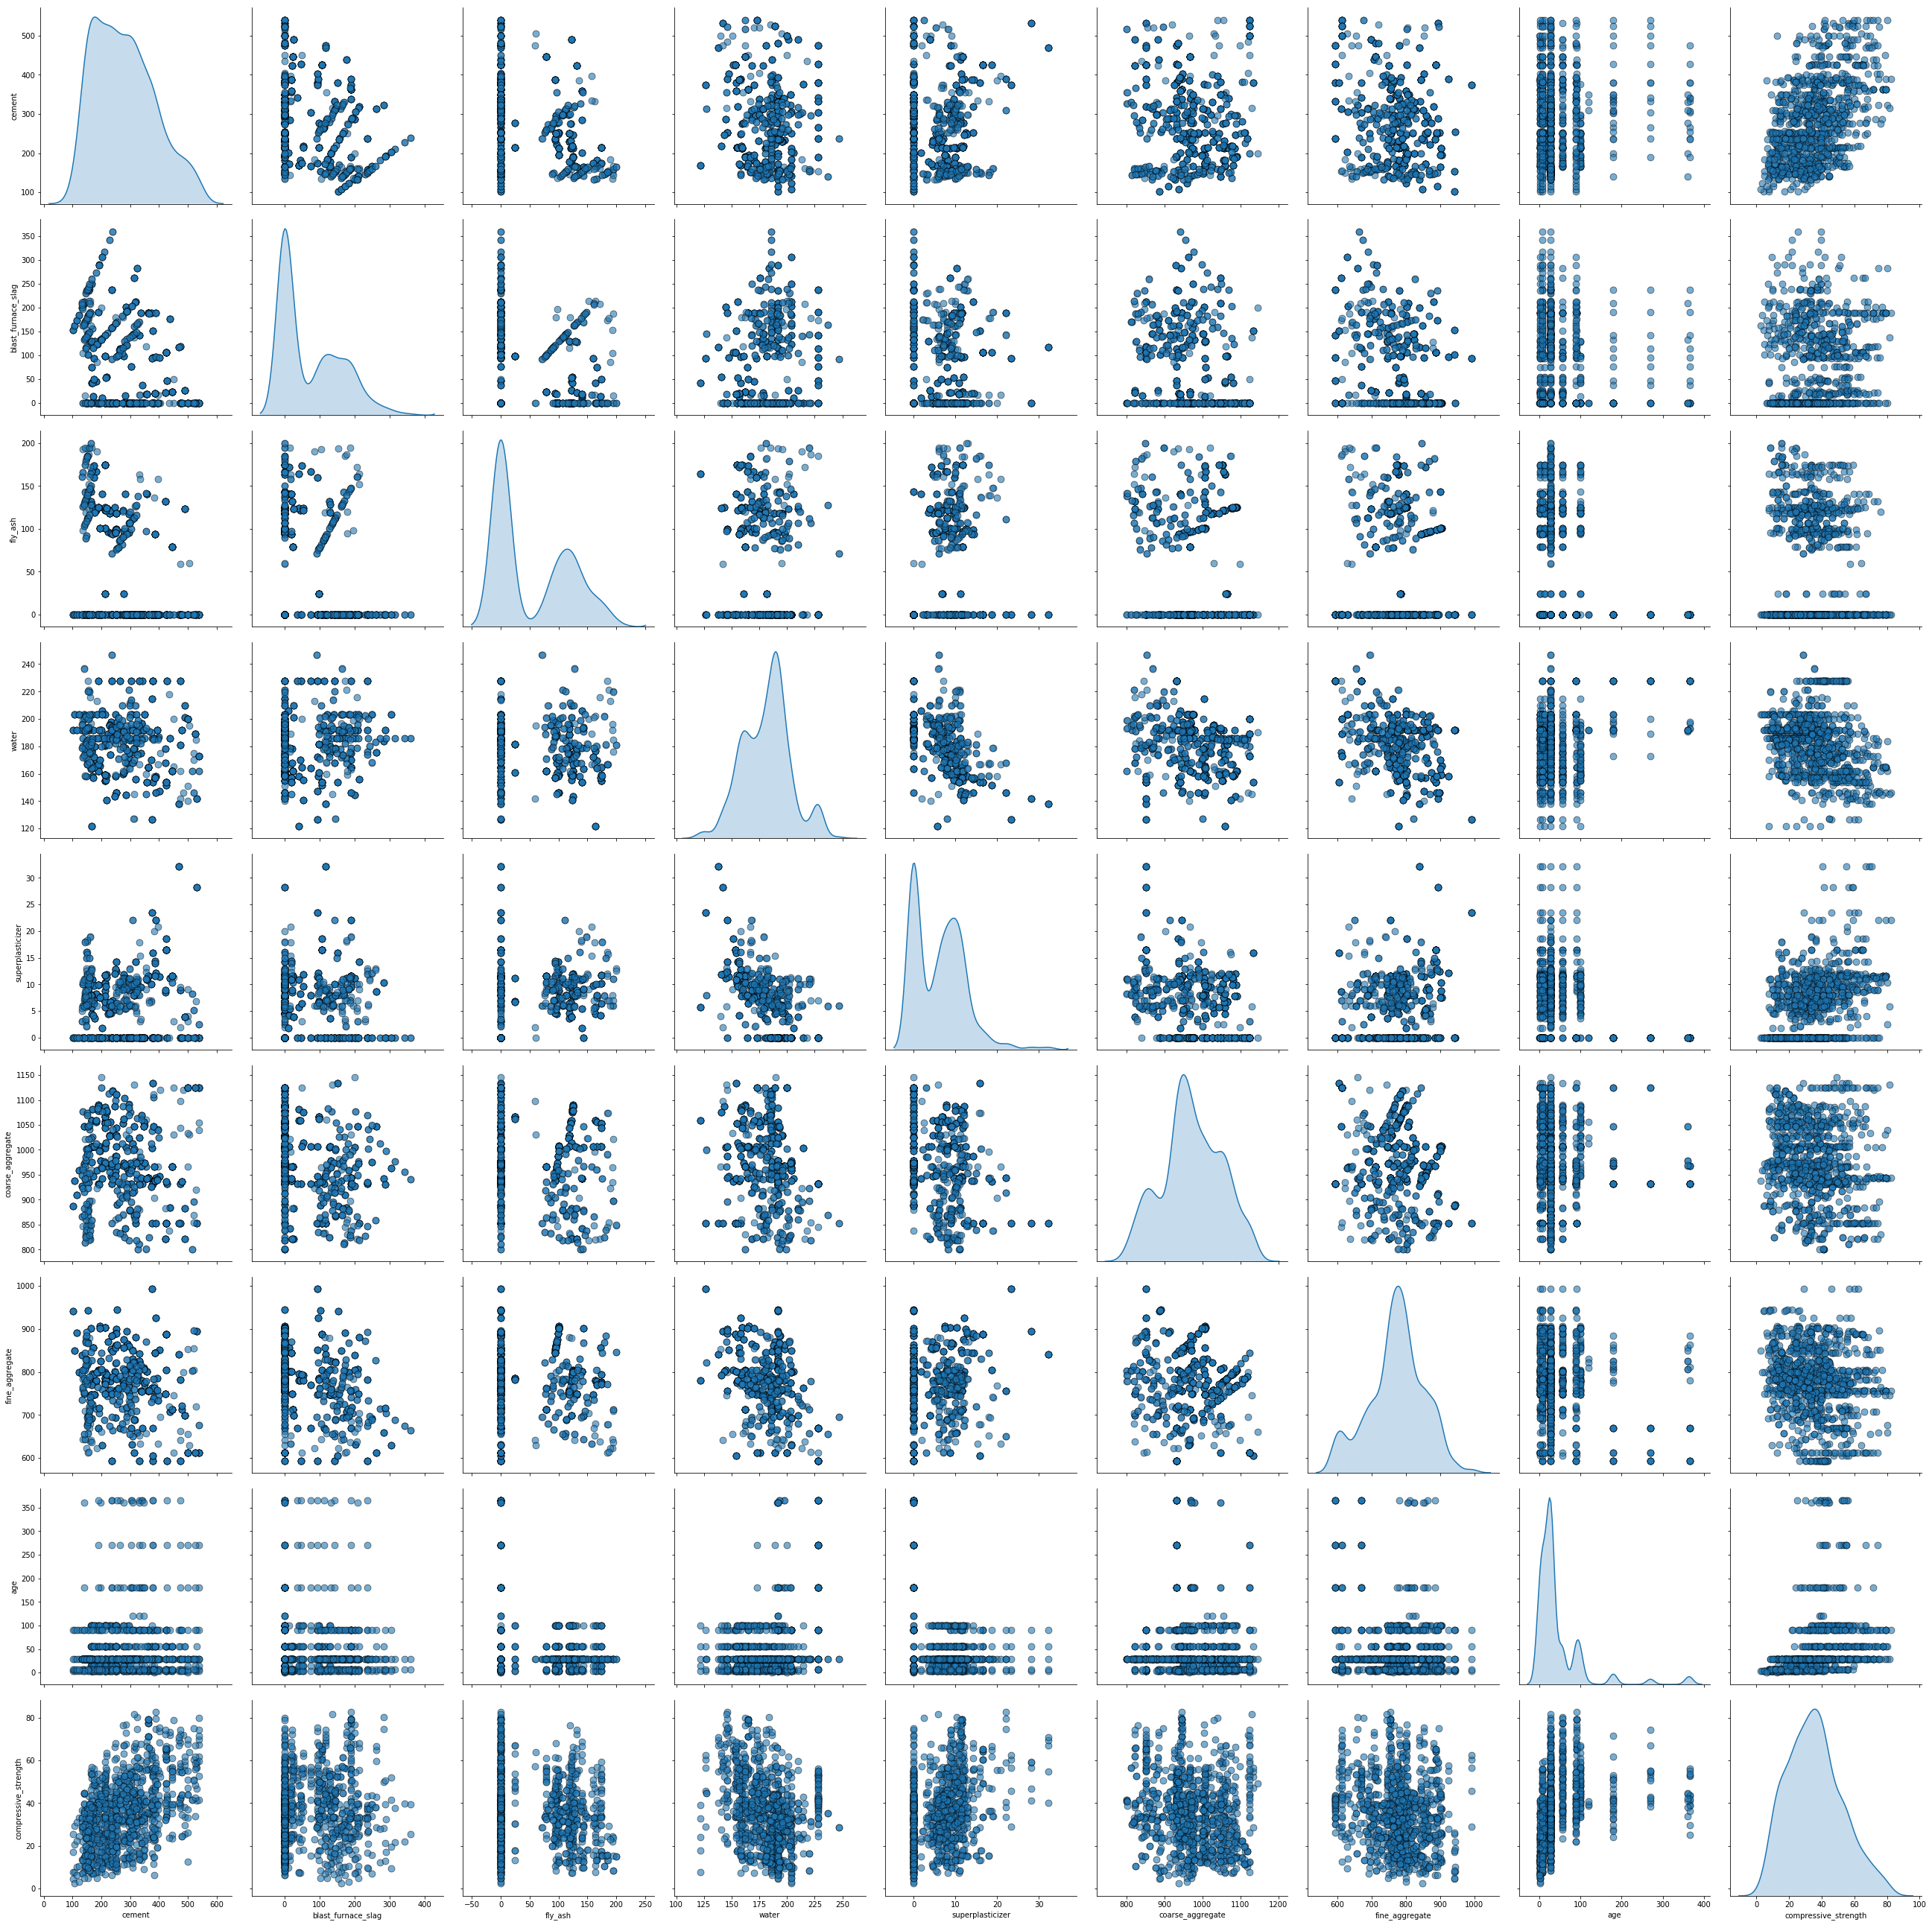

In [27]:
pair_plot(df,df_numeric,None)

## Model developement

### Train and test split

In [28]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, 
                               random_state=101)

In [30]:
len(train)

824

In [31]:
len(test)

206

In [33]:
X_train = train.copy().drop(['compressive_strength'],axis = 1)
y_train = train.compressive_strength
X_test = test.drop(['compressive_strength'],axis = 1)
y_test = test.compressive_strength

### Pre processing

In [36]:
numeric = list(X_train.select_dtypes(include=['float64','int64']).columns)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[numeric])
scaler.transform(X_train[numeric])
X_train_pre = pd.DataFrame(data = scaler.transform(X_train[numeric]), columns = numeric)
X_train_pre.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,-1.310660,-0.857906,1.265401,-0.046668,0.826243,0.078445,0.476388,-0.289226
1,1.354670,0.379616,-0.843055,-1.423912,2.081795,-0.479318,0.379976,0.166924
2,0.044834,0.544930,0.638861,0.271878,0.508170,-0.884498,-0.952490,-0.289226
3,0.479544,-0.857906,-0.843055,0.477996,-1.031974,-0.540865,0.860801,-0.631338
4,0.073847,-0.857906,0.674844,-0.642537,0.543325,-0.156457,1.137677,-0.696502


In [37]:
X_test_pre = pd.DataFrame(data = scaler.transform(X_test[numeric]), columns = numeric)
X_test_pre.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,-0.443144,-0.857906,-0.843055,0.571686,-1.031974,-0.069010,1.384888,-0.696502
1,-0.587730,0.855766,-0.843055,0.182872,-1.031974,1.046517,-0.354240,-0.631338
2,-1.394368,1.028064,1.145459,-0.458905,0.642096,-0.646006,-0.110737,-0.289226
3,-1.213635,-0.857906,1.413750,0.524841,0.474689,-1.235825,1.174759,-0.289226
4,0.879058,0.234094,-0.843055,-2.585669,2.885349,-1.555096,2.714883,-0.696502


### Random Forest